In [33]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

In [34]:
data = read_csv('data/agg/BTC_agg_OI_FR.csv', parse_dates=['timestamp'])
data = data.set_index('timestamp')
data

,Agg Weighted FR,Agg OI
timestamp,,
2020-04-01,-0.039073,6.966046e+08
2020-04-02,0.006521,6.665020e+08
2020-04-03,-0.021530,6.837366e+08
2020-04-04,-0.008062,6.865173e+08
2020-04-05,0.001697,6.757367e+08
...,...,...
2023-12-27,0.029520,3.147515e+09
2023-12-28,0.030703,3.135693e+09
2023-12-29,0.019693,3.065951e+09


Quantile_25: Mean = -0.05584171825000093, Std = 0.003374051073522608, Skew = 0.973966685231782


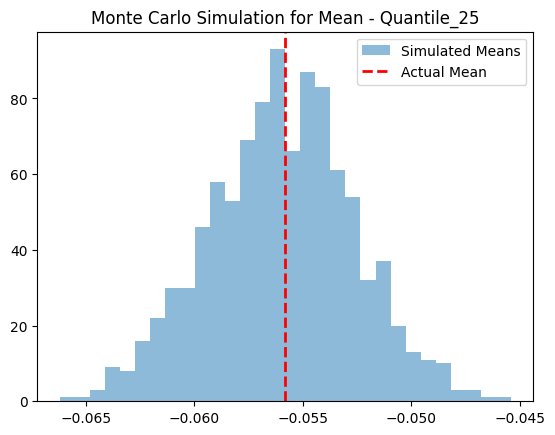

Quantile_50: Mean = -0.044826200341419147, Std = 0.0046529100225651985, Skew = -1.0867023949478414


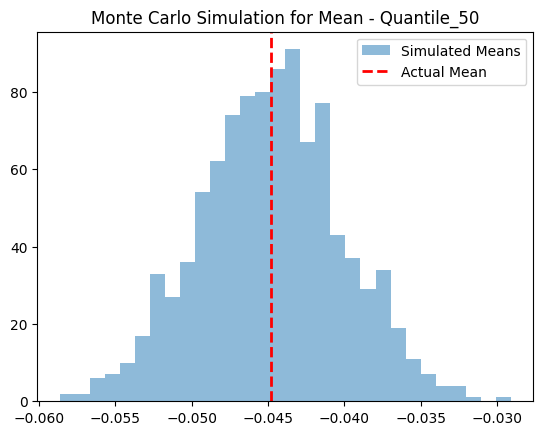

Quantile_75: Mean = -0.038432216849635964, Std = 0.0005892959643794105, Skew = -0.8835005596262147


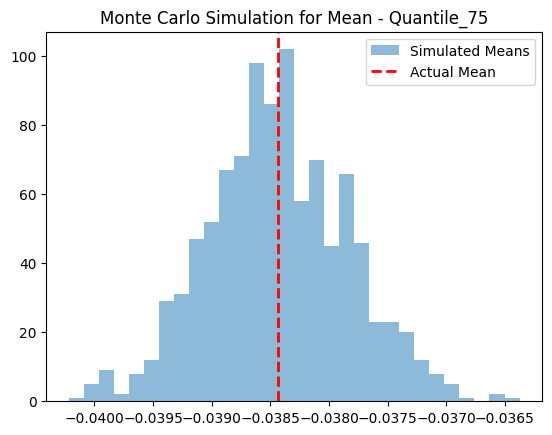

Quantile_95: Mean = 0.010029230014168358, Std = 0.026324996024906157, Skew = 4.042646248106128


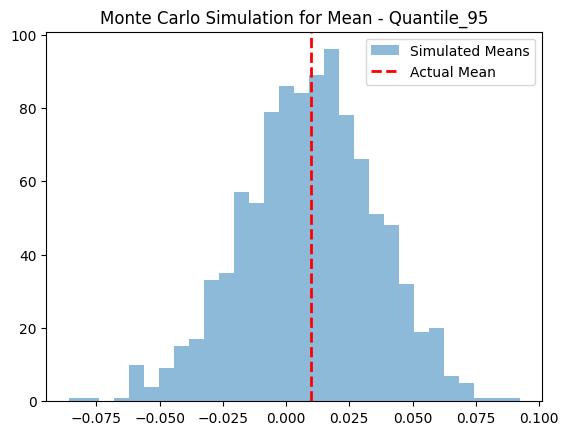

In [35]:
quantiles = [0.25, 0.50, 0.75, 0.95]
quantile_values = np.percentile(data['Agg Weighted FR'], quantiles)

quantile_dfs = {}


for i in range(len(quantiles)):
    if i < len(quantiles) - 1:
        quantile_df = data[(data['Agg Weighted FR'] >= quantile_values[i]) & (data['Agg Weighted FR'] < quantile_values[i+1])]
    else:
        quantile_df = data[data['Agg Weighted FR'] >= quantile_values[i]]

    quantile_dfs[f'Quantile_{int(quantiles[i]*100)}'] = quantile_df


for name, quantile_df in quantile_dfs.items():
    mean_value = quantile_df['Agg Weighted FR'].mean()
    std_value = quantile_df['Agg Weighted FR'].std()
    skew_value = quantile_df['Agg Weighted FR'].skew()

    print(f"{name}: Mean = {mean_value}, Std = {std_value}, Skew = {skew_value}")

    num_simulations = 1000
    simulated_means = np.random.normal(mean_value, std_value, num_simulations)

    plt.hist(simulated_means, bins=30, alpha=0.5, label='Simulated Means')
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Actual Mean')
    plt.title(f'Monte Carlo Simulation for Mean - {name}')
    plt.legend()
    plt.show()